# Cancer Preiction Model

Cancer poses a substantial global health challenge; however, ongoing progress in research, early detection
methods, and treatment option provides optimism for enhanced patient outcomes. Intrigued by the quest for 
a deeper understanding of the determinants contributing to the onset of cancer,I find myself compelled to embark on this
project.

### Mision and vision

This undertaking aspires to meticulously explore and construct a machine learning model with the primary objective of 
Predicting the likelihood of a Patient getting cancer giving certain health records such as age, gender, smoking, fatigue
and allergy.

### About the dataset

Constrained by the ethical considerations surrounding data usage, stringent public health privacy policies,
and challenges associated with suboptimal data collection practices,authentic datasets for my project were unattainable.
I have acquired synthetic data from Kaggle.com, which will serve as the cornerstone for my project.

For the gender variable
> Male----0


> Female--1

for the other variables/features
> yes/Positive----1


> No/Negative-----0

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, recall_score, accuracy_score, roc_auc_score, f1_score, precision_score
from imblearn.over_sampling import RandomOverSampler

In [2]:
# Import dataset
df = pd.read_csv('cancer_prediction_dataset.csv')
print(f'The data set has {df.shape[0]} observations and {df.shape[1]} variables')
df.head()

The data set has 10000 observations and 6 variables


,Gender,Age,Smoking,Fatigue,Allergy,Cancer
0,1,85,1,0,1,0
1,1,93,0,0,0,0
2,1,72,0,1,0,0
3,0,58,0,0,1,0
4,1,95,1,0,1,1


In [3]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Gender   10000 non-null  int64
 1   Age      10000 non-null  int64
 2   Smoking  10000 non-null  int64
 3   Fatigue  10000 non-null  int64
 4   Allergy  10000 non-null  int64
 5   Cancer   10000 non-null  int64
dtypes: int64(6)
memory usage: 468.9 KB


In [4]:
# checking for missing values
print(df.isnull().sum())

Gender     0
Age        0
Smoking    0
Fatigue    0
Allergy    0
Cancer     0
dtype: int64


#### All Variables look great with no missing data

In [5]:
# Printing all the columns of the dataset
df.columns

Index(['Gender', 'Age', 'Smoking', 'Fatigue', 'Allergy', 'Cancer'], dtype='object')

# Exploratory Data Analysis [EDA]

In [6]:
# Performing value counts for all the features
cols=['Smoking', 'Gender','Fatigue', 'Allergy', 'Cancer']
for col in cols:
    print(df[col].value_counts())
    print('-'*35)

1    5002
0    4998
Name: Smoking, dtype: int64
-----------------------------------
0    5025
1    4975
Name: Gender, dtype: int64
-----------------------------------
1    5018
0    4982
Name: Fatigue, dtype: int64
-----------------------------------
0    5001
1    4999
Name: Allergy, dtype: int64
-----------------------------------
0    9036
1     964
Name: Cancer, dtype: int64
-----------------------------------


>There a lot of male patients than female Patient

> patients who smoke are higher than those who do not smoke

>Patients who suffer from fatigue are higher than those who do not suffer from fatigue

>Patients without allergies are higher than those with allergies

>Patients who do not suffer from cancer are higher than those who suffer from cancer


0    5025
1    4975
Name: Gender, dtype: int64


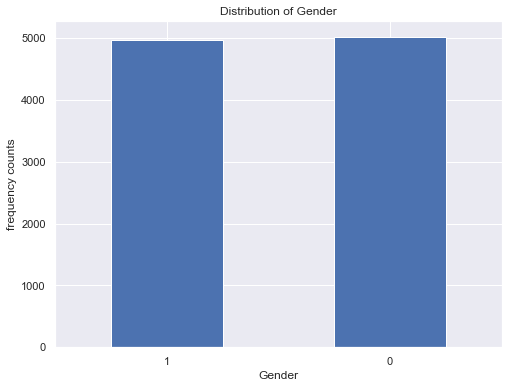

In [7]:
# GENDER
sns.set(rc={'figure.figsize':(8,6)})
g = df.Gender.value_counts()
print(g)
# Visualizing the gender
g.sort_values().plot.bar()
plt.xlabel('Gender')
plt.ylabel('frequency counts')
plt.title('Distribution of Gender')
plt.xticks(rotation=0);

In [8]:
# Proportion of value counts for gender expressed as Percentage(%)
g = df.Gender.value_counts(normalize = True) * 100
g

0    50.25
1    49.75
Name: Gender, dtype: float64

minimum Age; 18
maximum Age; 100
mean Age; 59.3184
median Age; 60.0


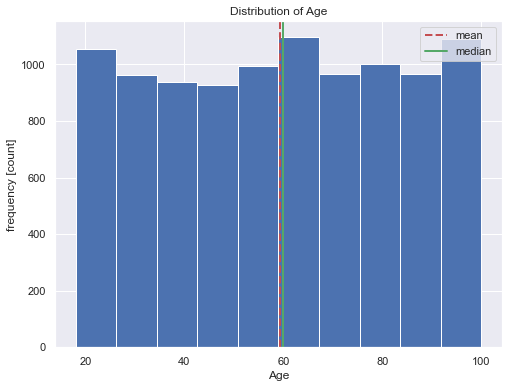

In [9]:
# AGE
min = df.Age.min()
max = df.Age.max()
mean = df.Age.mean()
median = df.Age.median()
print('minimum Age;', min)
print('maximum Age;', max)
print('mean Age;', mean)
print('median Age;', median)
# ploting
df.Age.hist()
plt.axvline(mean,color='r',linewidth=2,linestyle='--',label='mean')
plt.axvline(median,color='g',linewidth=2,linestyle='-',label='median')
plt.xlabel('Age')
plt.ylabel('frequency [count]')
plt.title('Distribution of Age')
plt.legend();

### Fatigue Analysis

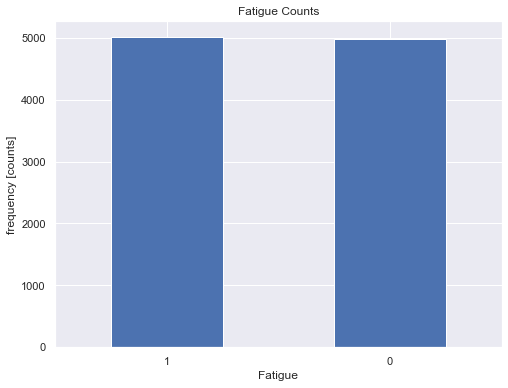

In [10]:
# VISUALIZATION OF FATIGUE
import matplotlib.pyplot as plt
df.Fatigue.value_counts().plot(kind='bar')
plt.xlabel('Fatigue')
plt.ylabel('frequency [counts]')
plt.title('Fatigue Counts')
plt.xticks(rotation=0);

In [11]:
# Gender Distribution of Patients with Fatigue
df[df['Fatigue']==1].Gender.value_counts().to_frame()

,Gender
0,2550
1,2468


Male patients suffer from fatigue than female patients

In [12]:
prop_female_fatigue=(2468/4975)*100
prop_male_fatigue=(2550/5025)*100
print('percentage of male with fatigue:',prop_male_fatigue)
print('percentage of female with fatigue:',prop_female_fatigue)

percentage of male with fatigue: 50.74626865671642
percentage of female with fatigue: 49.608040201005025


<AxesSubplot:>

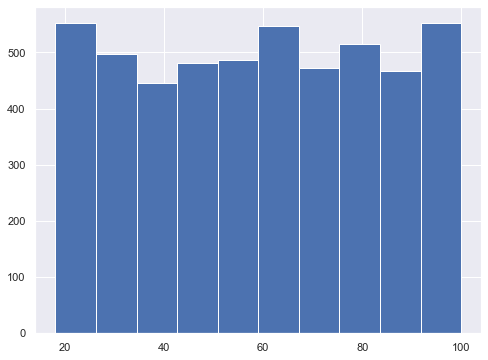

In [13]:
# Age Distribution of patients with fatigue
df.Fatigue.value_counts()
df[df['Fatigue']==1].Age.hist()

We can see from the distribution that adults patients in the range [20 to 35] and the aged in the range [60 to 100] suffer from 
fatigue more than every other patient form any other age ranges

This can be that majority of adult are in the labour force  and also the aged are weak. 
Patients within these age ranges are more likely to suffer from fatigue

### smoking Analysis

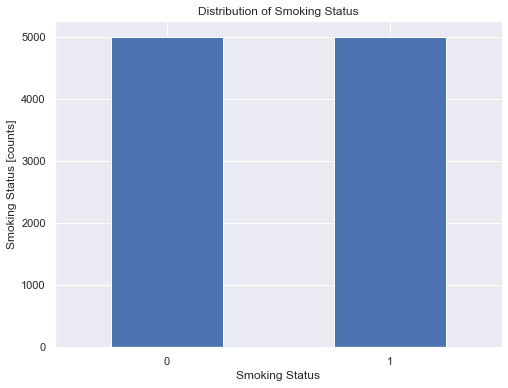

In [14]:
#VISUALIZATION OF SMOKING [COUNTS]
df.Smoking.value_counts().sort_values().plot.bar()
plt.xlabel('Smoking Status')
plt.ylabel('Smoking Status [counts]')
plt.title('Distribution of Smoking Status')
plt.xticks(rotation=0);

In [15]:
# Gender Distribution of Patients who Smokes
df[df['Smoking']==1].Gender.value_counts().to_frame()

,Gender
1,2508
0,2494


Female patients smokes more than male patients

In [16]:
prop_female_smokes=(2508/4975)*100
prop_male_smokes=(2494/5025)*100
print('percentage of male who smokes:',prop_male_smokes)
print('percentage of female who smokes:',prop_female_smokes)

percentage of male who smokes: 49.6318407960199
percentage of female who smokes: 50.41206030150753


<AxesSubplot:>

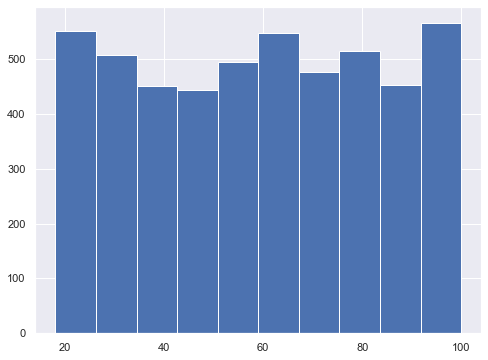

In [17]:
# Age Distribution of patients who Smokes
df.Smoking.value_counts()
df[df['Smoking']==1].Age.hist()

The aged patients in the age range [60 to 100] smokes more than every patients in other age ranges 

### Allergy Analysis

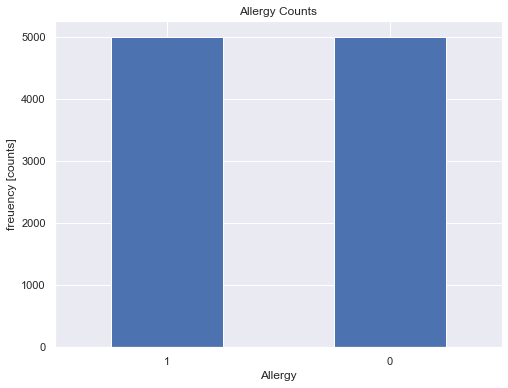

In [18]:
# VISUALIZATION OF ALLERGY[COUNTS]
df.Allergy.value_counts().sort_values().plot(kind='bar')
plt.xlabel('Allergy')
plt.ylabel('freuency [counts]')
plt.title('Allergy Counts')
plt.xticks(rotation=0);

In [19]:
# Gender Distribution of Patients who has allergy
df[df['Allergy']==1].Gender.value_counts().to_frame()

,Gender
0,2530
1,2469


Male patients have allergies more than female patients

In [20]:
prop_female_allergy=(2469/4975)*100
prop_male_allergy=(2530/5025)*100
print('percentage of male with allergy:',prop_male_allergy)
print('percentage of female who allergy:',prop_female_allergy)

percentage of male with allergy: 50.34825870646766
percentage of female who allergy: 49.62814070351759


<AxesSubplot:>

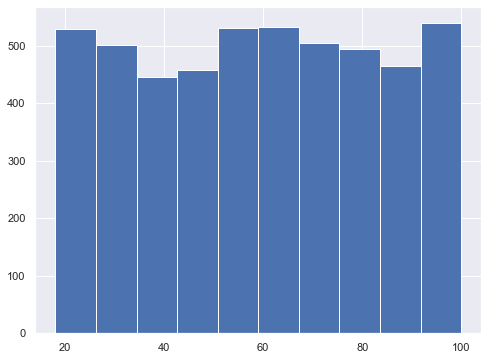

In [21]:
# Age Distribution of patients with Allergies
df.Smoking.value_counts()
df[df['Allergy']==1].Age.hist()

The aged patients in the age range [60 to 100] have allergies more than every patients in other age ranges

### CANCER ANALYSIS

0    90.36
1     9.64
Name: Cancer, dtype: float64


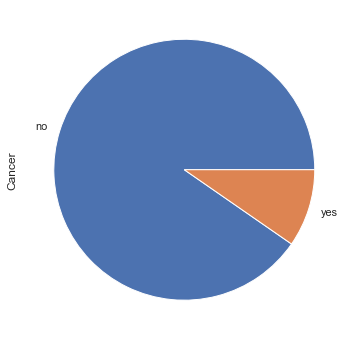

In [22]:
#VISUALIZATION OF CANCER[% COUNTS]
cancer_counts = df.Cancer.value_counts(normalize = True)*100
print(cancer_counts)
cancer_counts.plot.pie(labels = ['no', 'yes']);

<AxesSubplot:>

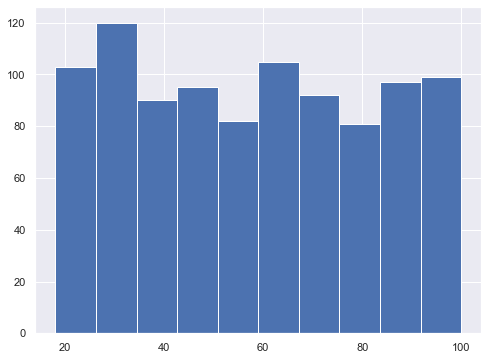

In [23]:
# Age Distribution of patient who had Cancer
df.Cancer.value_counts()
df[df['Cancer']==1].Age.hist()

adult patients within the age range [20 to 40]  suffer from cancer than every patients in any other age ranges

In [24]:
df[df['Cancer']==1].Fatigue.value_counts()

0    483
1    481
Name: Fatigue, dtype: int64

Patients without fatigue suffers from cancer than patients with fatigue

In [25]:
df[df['Cancer']==1].Allergy.value_counts()

1    488
0    476
Name: Allergy, dtype: int64

Patients with Allergies suffers from cancer than patients without Allergies

In [26]:
df[df['Cancer']==1].Smoking.value_counts()

0    488
1    476
Name: Smoking, dtype: int64

Patients who do not smoke suffer from cancer than patients who smoke

In [27]:
# Average Cancer Rate
mean = df.Cancer.mean()
print('The expected Probability of Cancer is:', mean)

The expected Probability of Cancer is: 0.0964


In [28]:
# Gender Distribution of Patients with Cancer
df[df['Cancer']==1].Gender.value_counts().to_frame()

,Gender
0,506
1,458


male patients suffer from cancer than female patients

In [29]:
prop_female_stroke=(458/4975)*100
prop_male_stroke=(506/5025)*100
print('percentage of male with stroke:',prop_male_stroke)
print('percentage of female with stroke:',prop_female_stroke)

percentage of male with stroke: 10.069651741293532
percentage of female with stroke: 9.206030150753769


In [30]:
# cancer rate per gender
df.groupby('Gender').aggregate({'Cancer':'mean'})

,Cancer
Gender,
0,0.100697
1,0.092060


male patients has higher rate of getting cancer than female patients

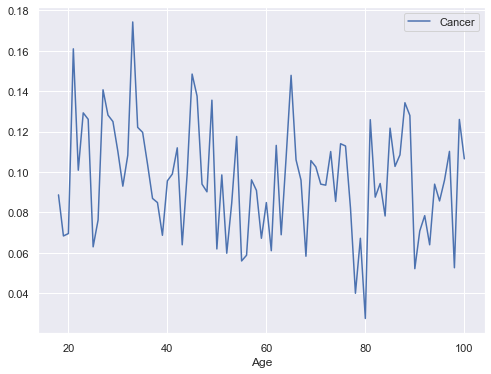

In [31]:
# Cancer rate per Age Distribution
df.groupby('Age').aggregate({'Cancer':'mean'}).plot();

# Performing more analysis on the dataset

In [32]:
d = df[(df['Gender'] == 1) & (df['Allergy'] == 1) & (df['Smoking']==1) & (df['Fatigue']==1) & (df['Cancer']==1) & (df['Age']<=25)]
d

# seven female patients, with their Ages less than 25 smokes, have allergies,fatigue and Cancer.


,Gender,Age,Smoking,Fatigue,Allergy,Cancer
1188,1,23,1,1,1,1
2086,1,25,1,1,1,1
2286,1,20,1,1,1,1
4125,1,23,1,1,1,1
6040,1,24,1,1,1,1
8729,1,18,1,1,1,1
8795,1,21,1,1,1,1


In [33]:
df[(df['Gender'] == 0) & (df['Allergy'] == 1) & (df['Smoking']==1) & (df['Fatigue']==1) & (df['Cancer']==1) & (df['Age']<=25)]

# four male patients, with their Ages less than 25 smokes, have allergies,fatigue and Cancer.


,Gender,Age,Smoking,Fatigue,Allergy,Cancer
1157,0,25,1,1,1,1
6858,0,21,1,1,1,1
7545,0,21,1,1,1,1
9976,0,23,1,1,1,1


In [34]:
df[(df['Gender'] == 1) & (df['Smoking']==1)  & (df['Cancer']==1) & (df['Age']<=45)]

# Eighty-four female Patients less than forty-five years of Age smokes and suffers from Cancer.

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
65,1,27,1,0,1,1
80,1,33,1,0,0,1
86,1,45,1,0,0,1
93,1,31,1,0,1,1
182,1,41,1,1,0,1
...,...,...,...,...,...,...
9156,1,32,1,0,1,1
9499,1,27,1,1,0,1
9634,1,22,1,1,0,1
9937,1,28,1,1,0,1


In [35]:
df[(df['Smoking']==1)  & (df['Cancer']==1) & (df['Age']>=60)]

# Two-hundred and forty-three old Age patients Smokes and suffers from Cancer.

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
4,1,95,1,0,1,1
37,1,63,1,0,0,1
64,0,95,1,0,0,1
78,1,63,1,0,1,1
214,0,91,1,1,1,1
...,...,...,...,...,...,...
9743,0,74,1,0,1,1
9808,0,86,1,1,0,1
9852,1,85,1,0,0,1
9891,0,65,1,1,0,1


In [36]:
df[(df['Gender'] == 0) & (df['Smoking']==0)  & (df['Allergy']==0) & (df['Age']==50)]

# Fifteen male Patients at Age fifty do not smoke and have Allergy.

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
257,0,50,0,0,0,0
945,0,50,0,0,0,0
1580,0,50,0,0,0,0
2866,0,50,0,0,0,0
4340,0,50,0,0,0,0
4386,0,50,0,1,0,0
4456,0,50,0,0,0,0
5801,0,50,0,1,0,0
6248,0,50,0,1,0,0
6929,0,50,0,0,0,0


In [37]:
df[(df['Smoking']==1) & (df['Age']<=19) & (df['Gender']==1)]


# sixty-three female teenage Patients Smokes.

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
5,1,18,1,0,0,0
112,1,19,1,1,1,0
459,1,18,1,1,0,0
583,1,18,1,0,1,1
799,1,19,1,1,0,0
...,...,...,...,...,...,...
9546,1,18,1,0,0,0
9729,1,18,1,0,1,0
9731,1,18,1,1,0,0
9795,1,19,1,1,1,0


In [38]:
df[(df['Cancer']==1) & (df['Age']<=19)]

# Nineteen Teenage Patients suffer from Cancer.


,Gender,Age,Smoking,Fatigue,Allergy,Cancer
326,1,18,0,0,1,1
583,1,18,1,0,1,1
1634,0,19,0,0,0,1
2243,0,18,0,1,1,1
2511,0,18,1,0,1,1
2526,1,18,0,0,0,1
3339,0,18,0,1,1,1
3346,0,19,1,0,0,1
3528,0,18,0,1,0,1
4038,0,18,1,0,0,1


<AxesSubplot:>

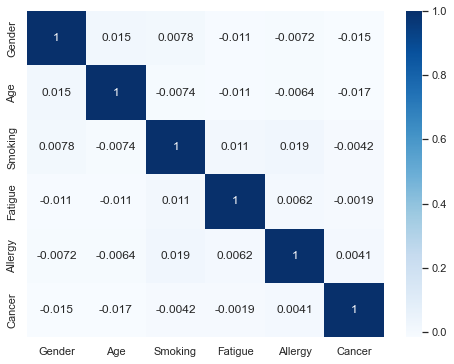

In [39]:
# Correlatiuon of features 
correlation=df.corr()
# Visualizing
sns.heatmap(correlation,cmap = 'Blues',annot= True)

###### Because there is a very week correlation between the target variable('Cancer') and the independent variables, the data wouldn't fit well with linear models such as Logistic regression model .In this Case we use non-linear models like decision trees or Random Forest

In [40]:
X = df.drop(columns=['Cancer'])                      
y = df['Cancer']

print('X shape:', X.shape, '\ny shape:', y.shape)

X shape: (10000, 5) 
y shape: (10000,)


In [41]:
X.head()

,Gender,Age,Smoking,Fatigue,Allergy
0,1,85,1,0,1
1,1,93,0,0,0
2,1,72,0,1,0
3,0,58,0,0,1
4,1,95,1,0,1


In [42]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (9000, 5)
y_train shape: (9000,)
X_test shape: (1000, 5)
y_test shape: (1000,)


# Building the model

### Baseline

In [43]:
# Calculating the baseline accuracy
acc_baseline = df['Cancer'].value_counts(normalize = True).max()
print('The baseline accuracy is ', round(acc_baseline * 100, 4), '%')

The baseline accuracy is  90.36 %


### Iterate

Using GridSearchCv to get the best hyperparameter for the model

In [44]:
# Creating a dictionary with range of hyperparameters for hyperparameter tunning
params = {
    "max_depth": [ 100, 200, 300],  # Maximum depth of each tree
    "n_estimators": [100, 200, 300], # Number of trees in the forest
    'min_samples_split':[5, 10, 15],# Minimum number of samples required to split a node
    'min_samples_leaf':[1, 2, 3],  # Minimum nuber of samples required at each leaf node
    'max_features':['sqrt','log2'], # Number of features to consider
}
params

{'max_depth': [100, 200, 300],
 'n_estimators': [100, 200, 300],
 'min_samples_split': [5, 10, 15],
 'min_samples_leaf': [1, 2, 3],
 'max_features': ['sqrt', 'log2']}

In [45]:
# Creating GridSearchCv to get the best hyperparameters for the model
model = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid = params,
    cv = 2, # Number of cross validations
    scoring='accuracy',
    n_jobs = -1, 
    verbose = 1
)
model

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [100, 200, 300],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [46]:
y_train.value_counts()

0    8134
1     866
Name: Cancer, dtype: int64

#### using Oversampling on our training data to prevent bias and increase the number of cancer patients since it was low

In [47]:
# peforming OverSampling on the training data
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [48]:
# Printing the shape of our resampled data
print('X-resampled:',X_resampled.shape, "\ny-resampled:", y_resampled.shape)

X-resampled: (16268, 5) 
y-resampled: (16268,)


In [49]:
y_resampled.value_counts()

0    8134
1    8134
Name: Cancer, dtype: int64

In [50]:
# fitting the model in our training dataset
model.fit(X_train, y_train)

Fitting 2 folds for each of 162 candidates, totalling 324 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [100, 200, 300],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [51]:
# finding the best params for the model
best_params= model.best_params_
best_params

{'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 300}

In [52]:
# creating a new model with best params
model_rfc = RandomForestClassifier(random_state = 42, **best_params)
model_rfc

RandomForestClassifier(max_depth=100, max_features='sqrt', min_samples_split=15,
                       n_estimators=300, random_state=42)

fitting the model with the oversampled data 

In [53]:
# Fitting the new model with the best params into the Oversampled dataset
model_rfc.fit(X_resampled, y_resampled)

RandomForestClassifier(max_depth=100, max_features='sqrt', min_samples_split=15,
                       n_estimators=300, random_state=42)

In [54]:
index_list = X_train.columns.tolist()
index_list

['Gender', 'Age', 'Smoking', 'Fatigue', 'Allergy']

In [55]:
# Feature importance
feat_imp = model_rfc.feature_importances_.tolist()
feat_imp

[0.01827706919808644,
 0.9146323270696145,
 0.021704554572124047,
 0.02281075797665506,
 0.02257529118351988]

In [56]:
# feature importance dataframe
df_feat_imp = pd.DataFrame({'feature importance': feat_imp}, index=index_list)
df_feat_imp

,feature importance
Gender,0.018277
Age,0.914632
Smoking,0.021705
Fatigue,0.022811
Allergy,0.022575


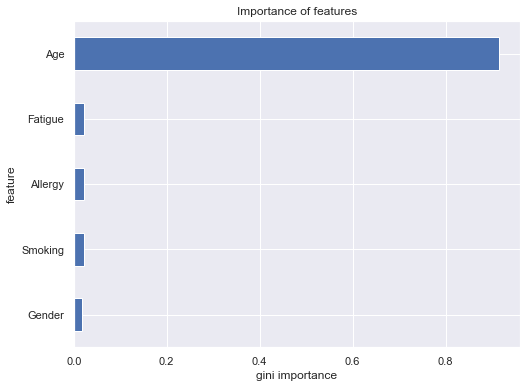

In [57]:
df_feat_imp.sort_values(by = 'feature importance', ascending=True).plot.barh(legend = False);

# label axis
plt.xlabel('gini importance')
plt.ylabel('feature')
plt.title('Importance of features');

#### Age has the most influence on the model's prediction

In [58]:
# Predicting the Oversampled training data
y_re = model_rfc.predict(X_resampled)
y_re[:20]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1],
      dtype=int64)

In [59]:
# predict the test data
y_pred = model_rfc.predict(X_test)
y_pred[:20]

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0],
      dtype=int64)

In [60]:
# calculate the testing accuracy
test_acc = model_rfc.score(X_test, y_pred)
print(f"Test accuracy: {test_acc * 100}%")

Test accuracy: 100.0%


In [61]:
# calculate the resample_training accuracy
re_training_acc = model_rfc.score(X_resampled, y_resampled)
print(f"Training accuracy for overSampled data: {round(re_training_acc* 100, 4) }%")

Training accuracy for overSampled data: 76.7703%


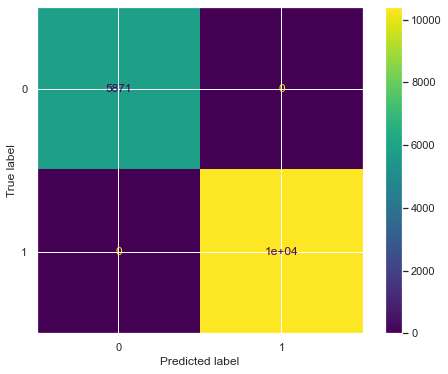

In [62]:
# create a confusion matrix to analyze the model performance on the overSampled training data
ConfusionMatrixDisplay.from_estimator(model_rfc,X_resampled ,y_re );

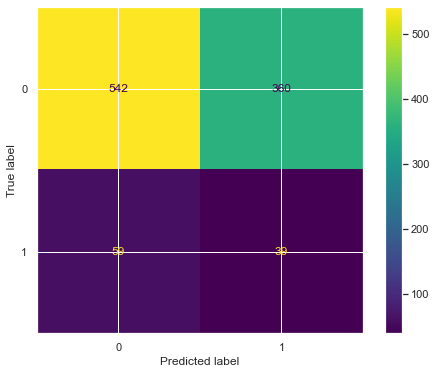

In [63]:
# create a confusion matrix for model analysis
ConfusionMatrixDisplay.from_estimator(model_rfc,X_test ,y_test );

In [64]:
y_pred_proba = model_rfc.predict_proba(X_test)[:, 1]
# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Calculate recall (also known as sensitivity or true positive rate)
recall = recall_score(y_test, y_pred)

# Calculate precision score
precision = precision_score(y_test, y_pred)

print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {auc_roc:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")

F1 Score: 0.1569
AUC-ROC Score: 0.4594
Recall: 0.3980
Precision: 0.0977


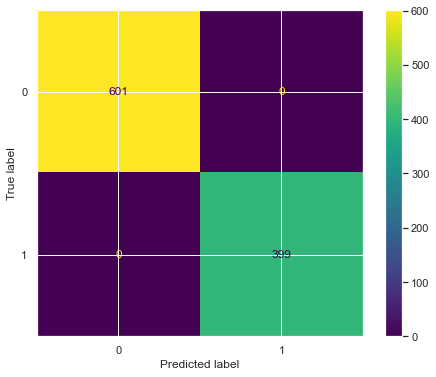

In [65]:
# create a confusion matrix to analyze the model performance on the test data
ConfusionMatrixDisplay.from_estimator(model_rfc, X_test, y_pred);

# MODEL DEPLOYMENT 

In [66]:
model_rfc.predict_proba(X_test)[:,1]

array([6.02431869e-01, 7.45329757e-01, 5.58469831e-02, 6.70099648e-01,
       4.22490842e-03, 4.41211577e-01, 3.46460090e-01, 8.10366235e-01,
       7.63676341e-01, 8.18244718e-03, 3.87452106e-02, 3.70890629e-01,
       1.15911295e-02, 4.71373572e-01, 1.59295294e-02, 5.70449478e-01,
       5.85252638e-01, 8.38371460e-03, 8.69555383e-01, 8.28156249e-03,
       6.55549191e-01, 3.95050125e-03, 8.36822109e-01, 9.08637904e-03,
       5.86879592e-03, 1.97505804e-01, 4.95658017e-01, 7.43805177e-01,
       1.47177038e-02, 4.99287520e-02, 2.85873266e-01, 6.75097083e-01,
       4.81127060e-03, 6.64387754e-01, 2.30545278e-01, 7.28524271e-01,
       4.76161616e-03, 7.54348056e-01, 1.50000000e-03, 3.08496686e-01,
       5.16042781e-03, 7.78190596e-01, 6.39977610e-01, 7.20641748e-01,
       6.72586620e-02, 5.99085852e-01, 2.10107165e-02, 5.33255751e-02,
       9.21416237e-02, 5.98609978e-01, 3.88178716e-01, 3.22295992e-01,
       1.70424741e-02, 2.53344789e-02, 4.68696830e-01, 6.87568253e-01,
      

In [67]:
import gradio as gr

# create a function to predict stroke
def predicta(Gender, Age, Smoking, Fatigue, Allergy):
    
    # create a dataframe with the inputs
    df = pd.DataFrame({
        'Gender': [Gender], 
        ' Age':[ Age],
        'Smoking': [Smoking],
        'Fatigue': [Fatigue],
        'Allergy': [Allergy]
    })
    
    # make prediction
    y_pred = model_rfc.predict_proba(df)[:,1] 
    
    
    # return the stroke probability
    return y_pred[0]
    
    # return the stroke probability

# give the function an interface
app = gr.Interface(
    title= "Cancer Prediction App",
    fn=predicta,
    inputs=["number","number", "number", "number", "number"],
    outputs=["number"]
)
app.launch()

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
